## Transformada de Hough

In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
# %matplotlib inline
# %matplotlib
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#### Transformada de Hough - Líneas

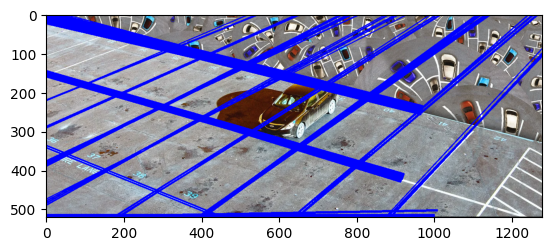

In [2]:
# Leemos la imagen
#=================
img = cv.imread('parking.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# Obtenemos los bordes por Canny
#===============================
edges = cv.Canny(gray, 220, 260, apertureSize = 3)
#plt.figure(figsize=(20,20))


# Obtenemos las líneas por la transformada de Hough
#==================================================
rho_step = 1
theta_step = (np.pi/180)*1
thresh = 250
lines = cv.HoughLines(edges, rho_step, theta_step, thresh, min_theta=0, max_theta=180)

# Dibujamos lo resultados
#========================
img2show = img.copy()
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(img2show, (x1, y1), (x2, y2), (0, 0, 255), 2)
#cv.imwrite('houghlines3.jpg',img)
#plt.figure(figsize=(20,20))
plt.imshow(img2show)
plt.show()

### Transformada de Hough Probabilistica

Paper: Jiri Matas, Charles Galambos, and Josef Kittler. Robust detection of lines using the progressive probabilistic hough transform. Computer Vision and Image Understanding, 78(1):119–137, 2000.

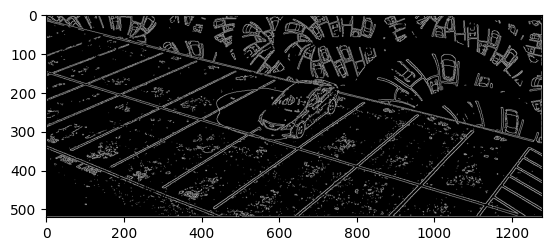

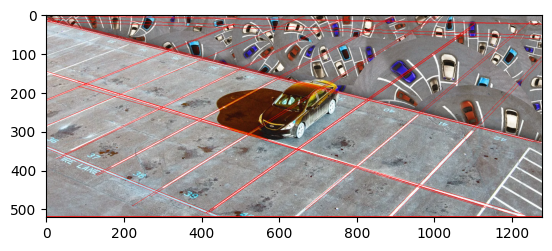

In [3]:
# Probabilistic Line Transform
# Leemos la imagen
#=================
img = cv.imread('parking.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Obtenemos los bordes por Canny
#===============================
edges = cv.Canny(gray, 220, 260, apertureSize = 3)
plt.figure()
plt.imshow(edges, cmap='gray')
plt.show()
linesP = cv.HoughLinesP(edges, 1, np.pi / 180, threshold=200, minLineLength=100, maxLineGap=220)
img2show = img.copy()
if len(linesP):
    for [[x1, y1, x2, y2]] in linesP:
        cv.line(img2show, (x1, y1), (x2, y2), (255, 0, 0), 1)
    plt.figure()
    plt.imshow(img2show)
    plt.show()
else:
    print('No se encontraron lineas')

#### Transformada de Hough - Círculos

In [4]:
# Leemos la imagen
#=================
img = cv.imread('tapitas.jpg')
#img = cv.imread('eyes.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Suavizamos la imagen
#=====================
gray = cv.medianBlur(gray,5)

In [5]:
# Obtenemos los círculos por la transformada de Hough
# (imagen en grises, método, flag de resolución del acumulador, dist mín entre centros de círculos
# umbral alto de Canny, umbral del acumulador, radio_min, radio_max)
#===================================================================
img_out = img.copy()

circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, minDist=10, param1=120, param2=40, minRadius=10, maxRadius=100)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # Dibujamos el círculo externo
    cv.circle(img_out,(i[0],i[1]),i[2],(0,255,0),2)
    # Dibujamos el centro del círculo
    cv.circle(img_out,(i[0],i[1]),2,(0,0,255),3)
cv.imshow('detected circles',img_out)
cv.waitKey(0)
cv.destroyAllWindows()